### Building a NLP model to identify the sentiment of the Review. 

#### About Dataset
###### Context
Movies' data is stored on several popular websites, but when it comes to critic reviews there is no better place than Rotten Tomatoes. This website allows to compare the ratings given by regular users (audience score) and the ratings given/reviews provided by critics (tomatometer) who are certified members of various writing guilds or film critic-associations.

###### Content
#### In the movies dataset each record represents a movie available on Rotten Tomatoes, with the URL used for the scraping, movie tile, description, genres, duration, director, actors, users' ratings, and critics' ratings. In the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

###### Acknowledgements
Data has been scraped from the publicly available website https://www.rottentomatoes.com as of 2020-10-31.
Since the data takes a few days to be scraped from the website, there is no full consistency between some fields of the movies and critics datasets such as "tomatometercount", "tomatometertopcriticscount", "tomatometerfreshcriticscount", and "tomatometerrottencriticscount" of the movies dataset compared to all records included in the critics dataset, which has been scraped first.


#### Approach:
1. Data Cleaning and Exploration
2. Data Preprocessing
3. Model development
4. Comparing the model performances. 

In [2]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
#Reading the files
df_mc = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

In [4]:
df_mc.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [5]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


#### Data Preprocessing and Cleaning:

In [6]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [7]:
df_mc.isnull().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [8]:
#For sentiment Analysis We need only two variables review_content and the review type to build the model.

In [9]:
req_cols = ['review_type', 'review_content']
df_mc = df_mc[req_cols]

In [10]:
##### Data Cleaning and Preprocessing. 

In [11]:
df_mc.isnull().sum()

review_type           0
review_content    65806
dtype: int64

In [12]:
df_mc.shape

(1130017, 2)

In [13]:
df_mc = df_mc.dropna()

In [14]:
df_mc.shape

(1064211, 2)

In [15]:
#### Removing the special characters from the Review content. 

In [16]:
import re
df_mc.review_content = [re.sub('[^a-zA-Z0-9]', ' ', df_mc.review_content.values[i]) for i in range(df_mc.shape[0])]

In [17]:
#importing libraries for NLP model building

In [18]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

In [19]:
df_mc['review_length'] = [len(df_mc.review_content.values[i]) for i in range(df_mc.shape[0])]

array([<AxesSubplot:title={'center':'Fresh'}>,
       <AxesSubplot:title={'center':'Rotten'}>], dtype=object)

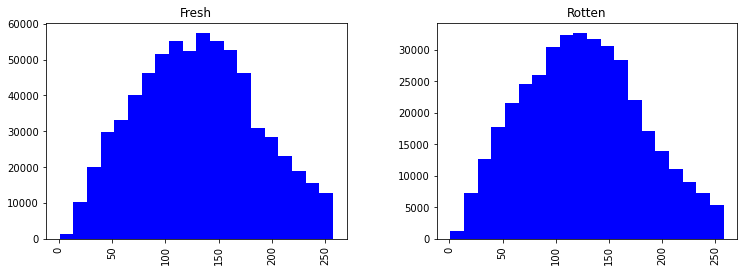

In [20]:
df_mc.hist(column='review_length', by='review_type', bins=20,figsize=(12,4),color='Blue')

In [21]:
#The distribution of the length of the review comments is normally distributed for both the cases. 

In [22]:
df_mc.shape

(1064211, 3)

In [23]:
#Removing duplicate reviews from the dataframe
df_mc.drop_duplicates(inplace=True)

In [24]:
df_mc.shape

(949079, 3)

In [25]:
### Model Building 

In [26]:
eng_stopwords = set(stopwords.words('english'))

In [27]:
#creating a function to remove the stopwords from the review
def cleaning_review(review):
    review = review.lower()
    review = ' '.join(word for word in review.split() if word not in eng_stopwords)
    return review

In [28]:
df_mc.review_content[0]

'A fantasy adventure that fuses Greek mythology to contemporary American places and values  Anyone around 15  give or take a couple of years  will thrill to the visual spectacle'

In [29]:
df_mc.review_content = df_mc.review_content.apply(cleaning_review)

In [30]:
df_mc.review_content[0]

'fantasy adventure fuses greek mythology contemporary american places values anyone around 15 give take couple years thrill visual spectacle'

In [31]:
from sklearn.model_selection import train_test_split
X = df_mc.review_content
y = df_mc.review_type

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=34)

In [32]:
X_train.shape, X_test.shape

((759263,), (189816,))

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

model_lr = make_pipeline(CountVectorizer(), 
                         TfidfTransformer(), 
                         LogisticRegression(max_iter=1000))
model_lr

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [34]:
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [35]:
print('Accuracy score  - Logistic Regression :', accuracy_score(pred_lr, y_test))

Accuracy score  - Logistic Regression : 0.8123867324145488


In [36]:
y_test.values[:10], pred_lr[:10]

(array(['Fresh', 'Fresh', 'Rotten', 'Rotten', 'Rotten', 'Rotten', 'Fresh',
        'Fresh', 'Rotten', 'Rotten'], dtype=object),
 array(['Fresh', 'Fresh', 'Fresh', 'Rotten', 'Rotten', 'Rotten', 'Fresh',
        'Fresh', 'Rotten', 'Fresh'], dtype=object))

In [37]:
print('LR classification_report:')
print(classification_report(y_test,pred_lr))

LR classification_report:
              precision    recall  f1-score   support

       Fresh       0.83      0.89      0.86    121429
      Rotten       0.78      0.67      0.72     68387

    accuracy                           0.81    189816
   macro avg       0.80      0.78      0.79    189816
weighted avg       0.81      0.81      0.81    189816



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

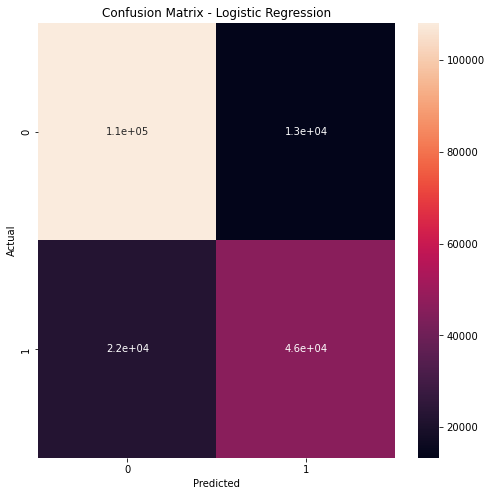

In [38]:
cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8,8))
sb.heatmap(cm_lr, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")

In [39]:
from sklearn.naive_bayes import MultinomialNB

model_nb = make_pipeline(CountVectorizer(), 
                         TfidfTransformer(), MultinomialNB())

model_nb.fit(X_train, y_train)

nb_pred = model_nb.predict(X_test)
print("Random Forest Accuracy Score :", round(accuracy_score(y_test, nb_pred)*100))

Random Forest Accuracy Score : 78


In [40]:
y_test.values[:10], nb_pred[:10]

(array(['Fresh', 'Fresh', 'Rotten', 'Rotten', 'Rotten', 'Rotten', 'Fresh',
        'Fresh', 'Rotten', 'Rotten'], dtype=object),
 array(['Rotten', 'Fresh', 'Fresh', 'Rotten', 'Rotten', 'Fresh', 'Fresh',
        'Fresh', 'Rotten', 'Fresh'], dtype='<U6'))

Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes Classifier')

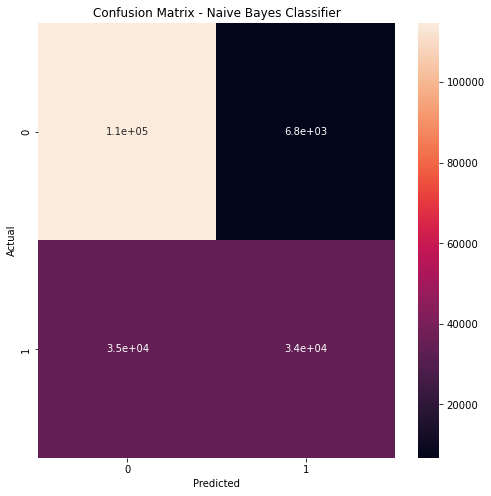

In [41]:
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8,8))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Classifier")

In [42]:
print('MultinomialNB classification_report:')
print(classification_report(y_test,nb_pred))

MultinomialNB classification_report:
              precision    recall  f1-score   support

       Fresh       0.77      0.94      0.85    121429
      Rotten       0.83      0.49      0.62     68387

    accuracy                           0.78    189816
   macro avg       0.80      0.72      0.73    189816
weighted avg       0.79      0.78      0.77    189816



#### Insights:
###### LogisticRegression model is performing better than Multinomial NaiveBayes Classifier.
###### In this the target variables are kept as such without converting them to numeric values.
###### Due to the limitation in the resources the XGBOOST and RandomForest classifiers are not executed as it will take long time to complete in my laptop. 